In [1]:
#import library 
import numpy as np
import pandas as pd


In [2]:
#load csv dataset 
df=pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

# 1.Data Cleaning

In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.groupby("Category").describe()


Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4


here we can see there is 747 spam email where 641 are unique out of total 5572 email.

In [6]:
#using label Encoder to convert category into binary number

from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [7]:

df['Category'] = encoder.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


here, 0 represent ham message where 1 represent spam message

In [8]:
#checking missing value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
#checking for duplicate value

df.duplicated().sum()

415

In [10]:
#removing all duplicate value
df= df.drop_duplicates(keep ='first')

In [11]:
df.duplicated().sum()

0

as we see now there is no dupilcate

In [12]:
df.shape

(5157, 2)

# 2. Exploratory  Data Analysis (EDA)


In [13]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#count value to see how many messege are ham and spam after duplication remove

df["Category"].value_counts()

0    4516
1     641
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x1f1785415d0>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

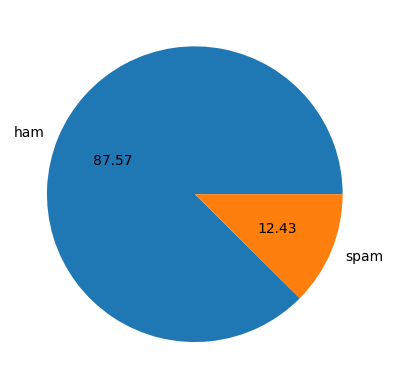

In [15]:
#visualize it in piechart

import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'] ,autopct = "%0.2f")

here we can see from piechart that 12.43% are spam out of total message. so data is imbalanced

In [16]:
# Now install and import nltk which help us to find how many charater , words and sentences used in message
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import nltk

In [18]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
#creating  feature based on message  column
df["Message"]


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [20]:
#apply len in message which give length in term of charater usesof every message and create column

df['Num_Characters']= df["Message"].apply(len)
df.head()

,Category,Message,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#identify number of words in every message using lambda function

df['Num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()
  

,Category,Message,Num_Characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#identify number of sentences using lambda function and sent_tokenize function which break sentences into small segment

df['Message'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Message, Length: 5157, dtype: object

here we see sentence is break down by usind coma

In [23]:
#create a column that give number of sentence of each message

df['Num_sentence'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Category,Message,Num_Characters,Num_words,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['Num_Characters','Num_words','Num_sentence']].describe()

,Num_Characters,Num_words,Num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#analysis seperately spam and ham message
#ham message
df[df['Category'] ==0][['Num_Characters','Num_words','Num_sentence']].describe()

,Num_Characters,Num_words,Num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#spam message
df[df['Category'] ==1][['Num_Characters','Num_words','Num_sentence']].describe()

,Num_Characters,Num_words,Num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [28]:
#plot histogram for both spam and ham message

import seaborn as sn

<Axes: xlabel='Num_Characters', ylabel='Count'>

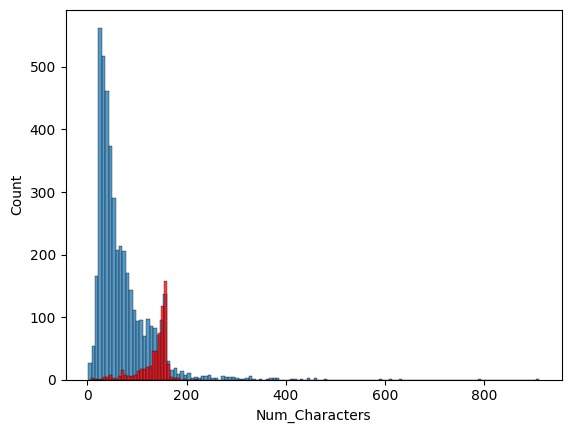

In [29]:

sn.histplot(df[df['Category']==0] ['Num_Characters'])
sn.histplot(df[df['Category']==1] ['Num_Characters'],color='red')

<Axes: xlabel='Num_words', ylabel='Count'>

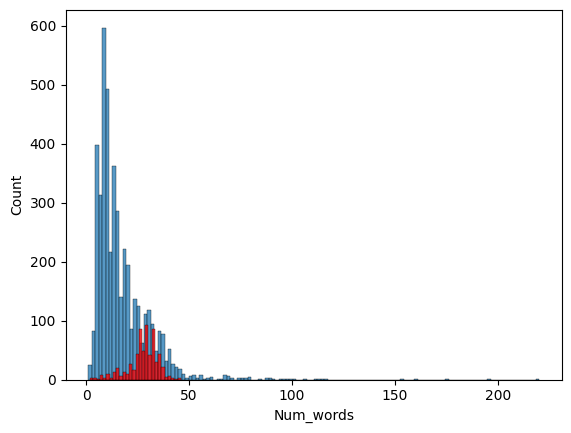

In [30]:
sn.histplot(df[df['Category']==0] ['Num_words'])
sn.histplot(df[df['Category']==1] ['Num_words'],color='red')

<Axes: xlabel='Num_sentence', ylabel='Count'>

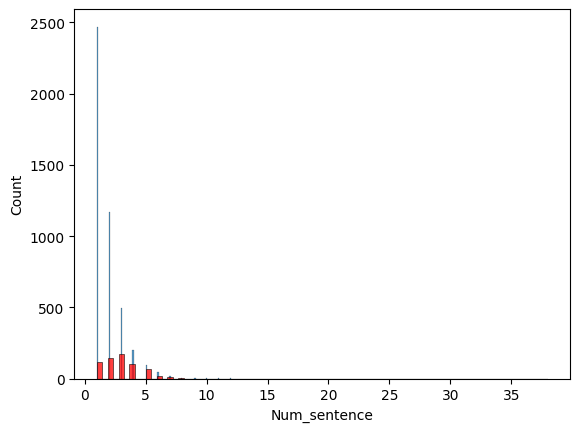

In [31]:
sn.histplot(df[df['Category']==0] ['Num_sentence'])
sn.histplot(df[df['Category']==1] ['Num_sentence'],color='red')

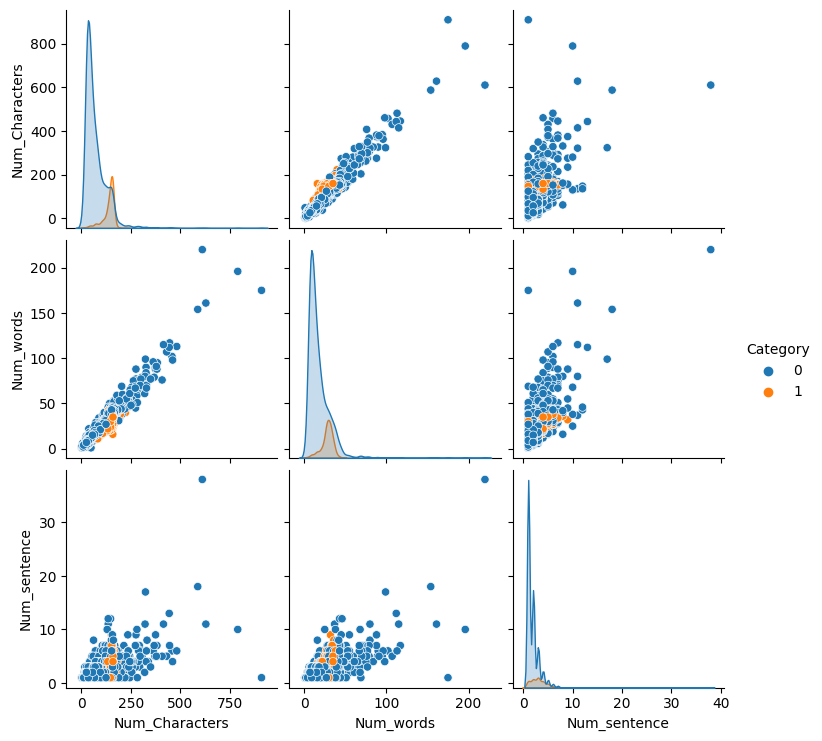

In [32]:
#create pairplot to see relationship charater,word and sentence

sn.pairplot(df,hue='Category')

C:\Users\hp\AppData\Local\Temp\ipykernel_13900\1175172972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True)


<Axes: >

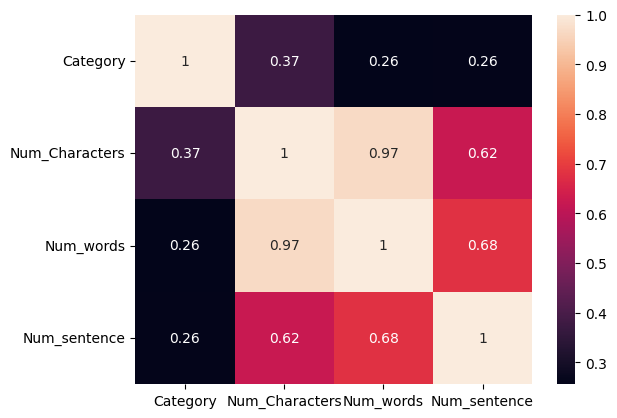

In [33]:
#create correlation' anf put heatmap
sn.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing


In [34]:
#create message into lowercase
def lowerChange(text):
    return text.lower() 

df['Message']=df['Message'].apply(lowerChange)
df['Message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5157, dtype: object

In [35]:
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
import string

In [36]:
#break the sentence into words using word_tokenization function and remove puncutation and stop words
def transform_message(text):
    #Remove punctations & numbers
    text=re.sub(r"[^a-zA-Z]", " ", text)
    
    #tokenize sentence into words 
    words=word_tokenize(text)
    
    #Remove stopwords
    stop_words=set(stopwords.words("english"))
    words=[word for word in words if word not in stop_words]
    
    return " ".join(words)
    

df['Transform_Msg']=df['Message'].apply(transform_message)
df.head(10)


,Category,Message,Num_Characters,Num_words,Num_sentence,Transform_Msg
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say early hor u c already say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though
5,1,freemsg hey there darling it's been 3 week's n...,147,39,4,freemsg hey darling week word back like fun st...
6,0,even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aids patent
7,0,as per your request 'melle melle (oru minnamin...,160,31,2,per request melle melle oru minnaminunginte nu...
8,1,winner!! as a valued network customer you have...,157,32,5,winner valued network customer selected receiv...
9,1,had your mobile 11 months or more? u r entitle...,154,31,3,mobile months u r entitled update latest colou...


In [37]:


from wordcloud import WordCloud


# create wordcloud for spam

In [38]:

wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [39]:
df1=df[df['Category']==1]
spam_wc= wc.generate(df1['Transform_Msg'].str.cat(sep=","))


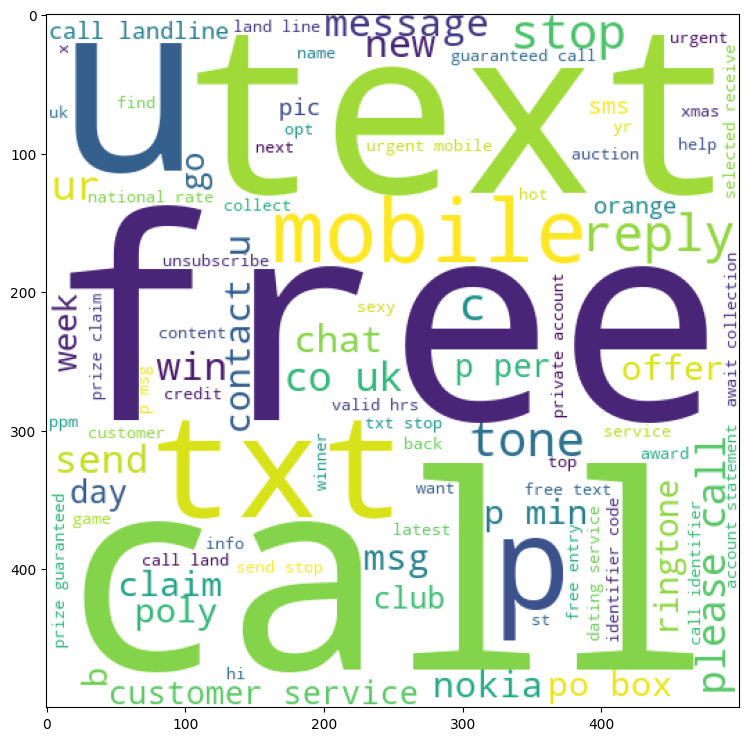

In [40]:
plt.figure(figsize=(12,9))
plt.imshow(spam_wc)

 # wordcloud for ham message 

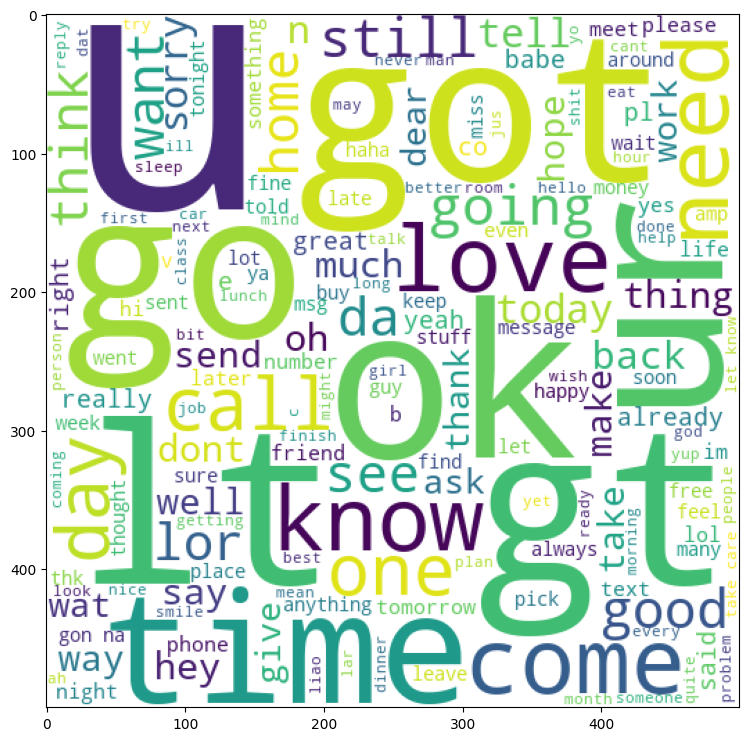

In [41]:

wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
df1=df[df['Category']==0]
spam_wc= wc.generate(df1['Transform_Msg'].str.cat(sep=","))
plt.figure(figsize=(12,9))
plt.imshow(spam_wc)


# 4. Model Building

In [42]:
df.head()

,Category,Message,Num_Characters,Num_words,Num_sentence,Transform_Msg
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say early hor u c already say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [43]:
#covert text message into number using vectorization
from sklearn.feature_extraction.text import CountVectorizer 
v= CountVectorizer()

In [44]:
X=v.fit_transform(df['Transform_Msg'])
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
X.shape

(5157, 7619)

In [46]:
y=df['Category'].values

In [47]:
#training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [48]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB,BernoulliNB

mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

In [49]:
mnb.fit(x_train,y_train)
y_predict1=mnb.predict(x_test)

In [50]:
gnb.fit(x_train.toarray(),y_train)
y_predict2=gnb.predict(x_test.toarray())

In [51]:
bnb.fit(x_train,y_train)
y_predict3=bnb.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,precision_score

print("From Gaussian model",accuracy_score(y_test,y_predict1))
print("From Multinomial model",accuracy_score(y_test,y_predict2))
print("From Bernoulli model",accuracy_score(y_test,y_predict3))

From Gaussian model 0.9775193798449613
From Multinomial model 0.8829457364341086
From Bernoulli model 0.9782945736434109


#### Here,Both Gaussian and Bernoulli model give highest accuray which is 97%

In [53]:
#for precision score
print("From Gaussian model",precision_score(y_test,y_predict1))
print("From Multinomial model",precision_score(y_test,y_predict2))
print("From Bernoulli model",precision_score(y_test,y_predict3))

From Gaussian model 0.88
From Multinomial model 0.52
From Bernoulli model 0.9652777777777778


#### here,precision is a metric that quantifies the number of correct positive predictions made. Brenoulli model has high precision score. That's why we go with the Bernoulli model. 

In [54]:
import pickle
pickle.dump(v,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))